In [41]:
import graphviz
import pandas as pd
from sklearn import datasets
from utils import performance as pe
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, ConfusionMatrixDisplay
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree

## 1. Loading Iris Dataset

In [20]:
iris = datasets.load_iris()
print(iris.keys())

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])


In [21]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [22]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [23]:
iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
iris_df["target"] = iris.target

In [24]:
I = iris_df.drop("target", axis=1)
j = iris_df["target"]

## 2. Training Decision Tree Model

### 2.1 Analysis of performance.

In [79]:
import matplotlib.pyplot as plt

In [33]:
#clf model with max_depth = 4
clf = DecisionTreeClassifier(random_state=00000, criterion="gini", max_depth=4)
clf

DecisionTreeClassifier(max_depth=4, random_state=0)

In [34]:
# Splitting dataset.
I_train, I_test, j_train, j_test = train_test_split(I, j, random_state=00000, test_size=0.3)
clf.fit(I_train, j_train)

DecisionTreeClassifier(max_depth=4, random_state=0)

In [36]:
# Predicting and calculating accuracy
j_pred_test = clf.predict(I_test)
accu = accuracy_score(j_test, j_pred_test)
print(classification_report(j_test, j_pred_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       1.00      0.94      0.97        18
           2       0.92      1.00      0.96        11

    accuracy                           0.98        45
   macro avg       0.97      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45



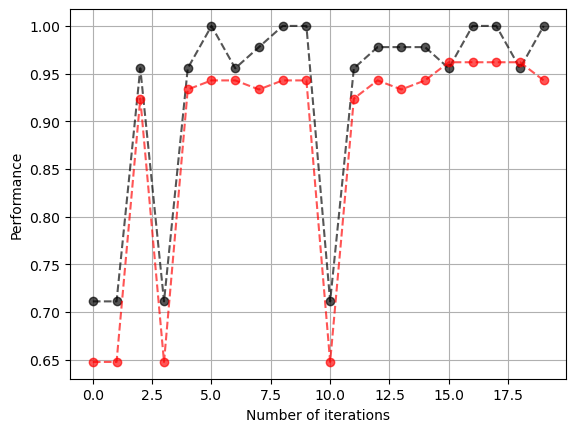

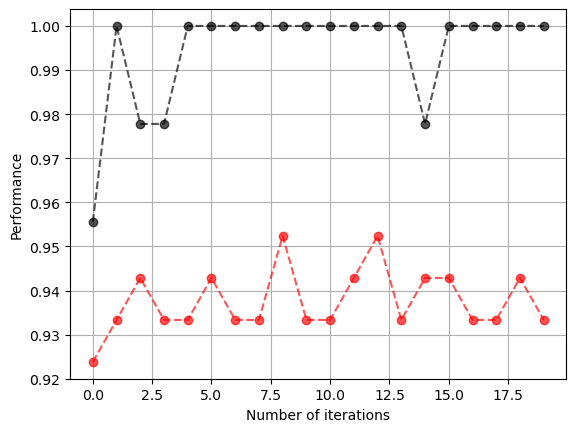

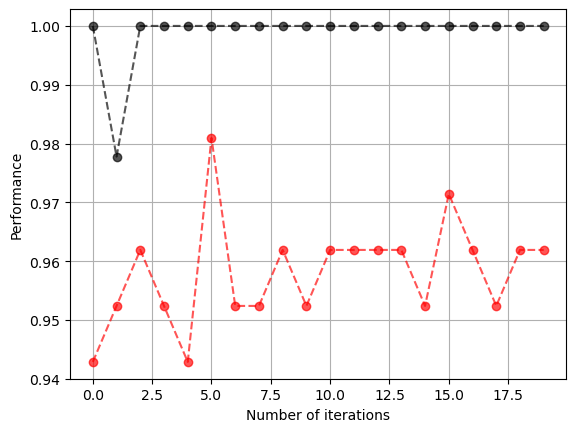

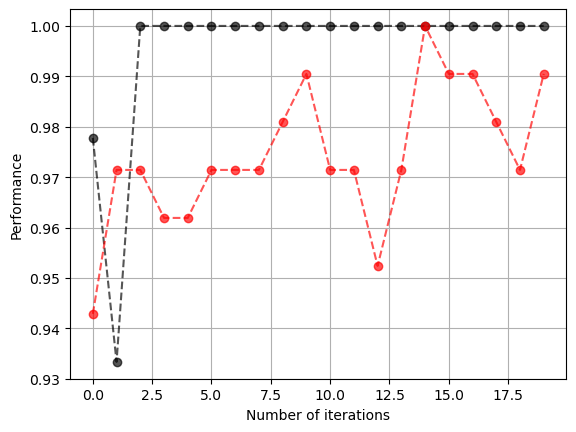

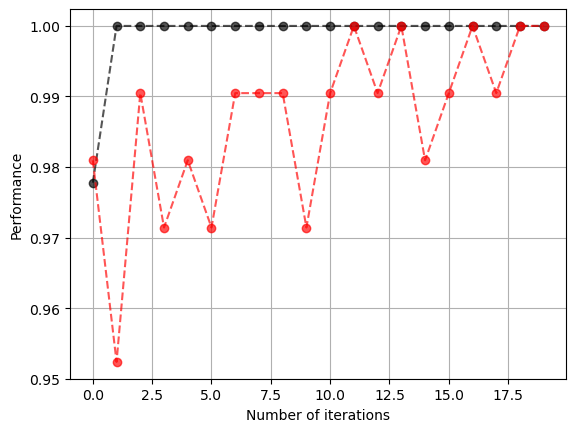

In [90]:
for i in range(1,6):
    pe.performance_plot(20, I, j, depth=i)

## 3. Decision Tree Plot

In [37]:
dot_data = tree.export_graphviz(clf, out_file=None, feature_names=iris.feature_names, class_names=iris.target_names, filled=True)
dot_data

'digraph Tree {\nnode [shape=box, style="filled", color="black", fontname="helvetica"] ;\nedge [fontname="helvetica"] ;\n0 [label="petal width (cm) <= 0.75\\ngini = 0.664\\nsamples = 105\\nvalue = [34, 32, 39]\\nclass = virginica", fillcolor="#f6f1fd"] ;\n1 [label="gini = 0.0\\nsamples = 34\\nvalue = [34, 0, 0]\\nclass = setosa", fillcolor="#e58139"] ;\n0 -> 1 [labeldistance=2.5, labelangle=45, headlabel="True"] ;\n2 [label="petal length (cm) <= 4.95\\ngini = 0.495\\nsamples = 71\\nvalue = [0, 32, 39]\\nclass = virginica", fillcolor="#e8dbfa"] ;\n0 -> 2 [labeldistance=2.5, labelangle=-45, headlabel="False"] ;\n3 [label="petal width (cm) <= 1.65\\ngini = 0.161\\nsamples = 34\\nvalue = [0, 31, 3]\\nclass = versicolor", fillcolor="#4ce88d"] ;\n2 -> 3 ;\n4 [label="gini = 0.0\\nsamples = 30\\nvalue = [0, 30, 0]\\nclass = versicolor", fillcolor="#39e581"] ;\n3 -> 4 ;\n5 [label="sepal width (cm) <= 3.1\\ngini = 0.375\\nsamples = 4\\nvalue = [0, 1, 3]\\nclass = virginica", fillcolor="#ab7bee"]

In [38]:
print(f"Iris accuracy score for clf model is: {accu:.5f}")

Iris accuracy score for clf model is: 0.97778


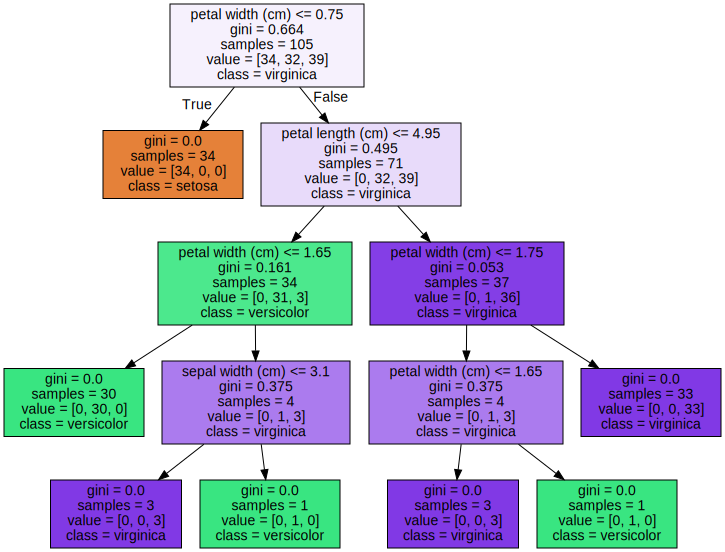

In [39]:
graphviz.Source(dot_data)

### 3.1 Tree plot with RandomForestClassifier

In [43]:
forest = RandomForestClassifier(n_estimators=30, max_depth=5, random_state=00000)
forest.fit(I_train, j_train)

RandomForestClassifier(max_depth=5, n_estimators=30, random_state=0)

In [44]:
j_forest_pred = forest.predict(I_test)
accu_forest = accuracy_score(j_test, j_forest_pred)
print(classification_report(j_test, j_forest_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       1.00      0.94      0.97        18
           2       0.92      1.00      0.96        11

    accuracy                           0.98        45
   macro avg       0.97      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45



In [75]:
report = classification_report(j_test, j_forest_pred, output_dict=True)
pd.DataFrame(report).T

,precision,recall,f1-score,support
0,1.000000,1.000000,1.000000,16.000000
1,1.000000,0.944444,0.971429,18.000000
2,0.916667,1.000000,0.956522,11.000000
accuracy,0.977778,0.977778,0.977778,0.977778
macro avg,0.972222,0.981481,0.975983,45.000000
weighted avg,0.979630,0.977778,0.977943,45.000000


In [47]:
print(f"Accuracy for Random Forest Classifier: {accu_forest:.5f}")

Accuracy for Random Forest Classifier: 0.97778


In [51]:
try:
    forest_data = tree.export_graphviz(forest, out_file=None, feature_names=iris.feature_names, class_names=iris.target_names, filled=True)
    forest_data
except AttributeError:
    print("'RandomForestClassifier' object has no attribute 'tree_'")

'RandomForestClassifier' object has no attribute 'tree_'
